# Formation ML Projet 5

### 1. Loading Libraries

In [27]:
from keras.layers import Dense,Dropout,Input,MaxPooling2D,ZeroPadding2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD
from tensorflow.keras.utils import img_to_array,load_img
from keras.applications.vgg16 import preprocess_input, decode_predictions
from os import walk
from keras.preprocessing.image import ImageDataGenerator
from sklearn.preprocessing import LabelEncoder ,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from PIL import Image
import os
from keras.utils import to_categorical
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv

pd.options.display.max_colwidth=150


### Chargement de l'ensemble de données

In [28]:
# path of the dogs images

img_files='./train_df/'


In [29]:
f = []
f1 = []
f2 = []

for (dirpath, dirnames, filenames) in walk(img_files):
    f2.extend(dirnames)
    
for dirname in f2:
    for (dirpath, dirnames, filenames) in walk(img_files+dirname):
        f.extend(list(map(lambda x: img_files+dirname+'/' + x, filenames)))
       

df_images= pd.DataFrame(zip(f), columns = ['img_path'])
df = df_images
df.sample(10)

,img_path
9175,./train_df/n02097658-silky_terrier/n02097658_8690.jpg
5804,./train_df/n02093859-Kerry_blue_terrier/n02093859_1062.jpg
17998,./train_df/n02111500-Great_Pyrenees/n02111500_1170.jpg
8742,./train_df/n02097298-Scotch_terrier/n02097298_6474.jpg
16577,./train_df/n02109961-Eskimo_dog/n02109961_2599.jpg
8528,./train_df/n02097209-standard_schnauzer/n02097209_1807.jpg
6802,./train_df/n02095314-wire-haired_fox_terrier/n02095314_464.jpg
108,./train_df/n02085620-Chihuahua/n02085620_4919.jpg
11893,./train_df/n02102318-cocker_spaniel/n02102318_10179.jpg
7243,./train_df/n02096051-Airedale/n02096051_161.jpg


Adding path of the dog image to its id and breed

In [30]:
def get_breed(str):
    breed = str.split("-",1)[1].split("/",1)[0]
    return breed

#df['breed'] =df['img_path'].apply(lambda path: get_breed(df['img_path'].str))

df['breed']= pd.Series([get_breed(i) for i in df['img_path']])

df.sample(10)

,img_path,breed
2737,./train_df/n02089078-black-and-tan_coonhound/n02089078_3196.jpg,black-and-tan_coonhound
5760,./train_df/n02093754-Border_terrier/n02093754_6646.jpg,Border_terrier
17939,./train_df/n02111277-Newfoundland/n02111277_5879.jpg,Newfoundland
1276,./train_df/n02086910-papillon/n02086910_6931.jpg,papillon
17161,./train_df/n02110627-affenpinscher/n02110627_7770.jpg,affenpinscher
14916,./train_df/n02107574-Greater_Swiss_Mountain_dog/n02107574_2582.jpg,Greater_Swiss_Mountain_dog
19232,./train_df/n02113023-Pembroke/n02113023_3684.jpg,Pembroke
13666,./train_df/n02105855-Shetland_sheepdog/n02105855_19002.jpg,Shetland_sheepdog
9891,./train_df/n02099429-curly-coated_retriever/n02099429_1627.jpg,curly-coated_retriever
19366,./train_df/n02113186-Cardigan/n02113186_12419.jpg,Cardigan


###  Basic Visualization

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20580 entries, 0 to 20579
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   img_path  20580 non-null  object
 1   breed     20580 non-null  object
dtypes: object(2)
memory usage: 321.7+ KB


In [32]:
def get_breed(str):
    breed = str.split("-",1)[1]
    return breed

labels = pd.Series([get_breed(i) for i in f2])

labels.shape

(120,)

In [33]:
#Number of different breed type
df.breed.value_counts()

Maltese_dog             252
Afghan_hound            239
Scottish_deerhound      232
Pomeranian              219
Bernese_mountain_dog    218
                       ... 
Irish_water_spaniel     150
affenpinscher           150
Bouvier_des_Flandres    150
Pekinese                149
redbone                 148
Name: breed, Length: 120, dtype: int64

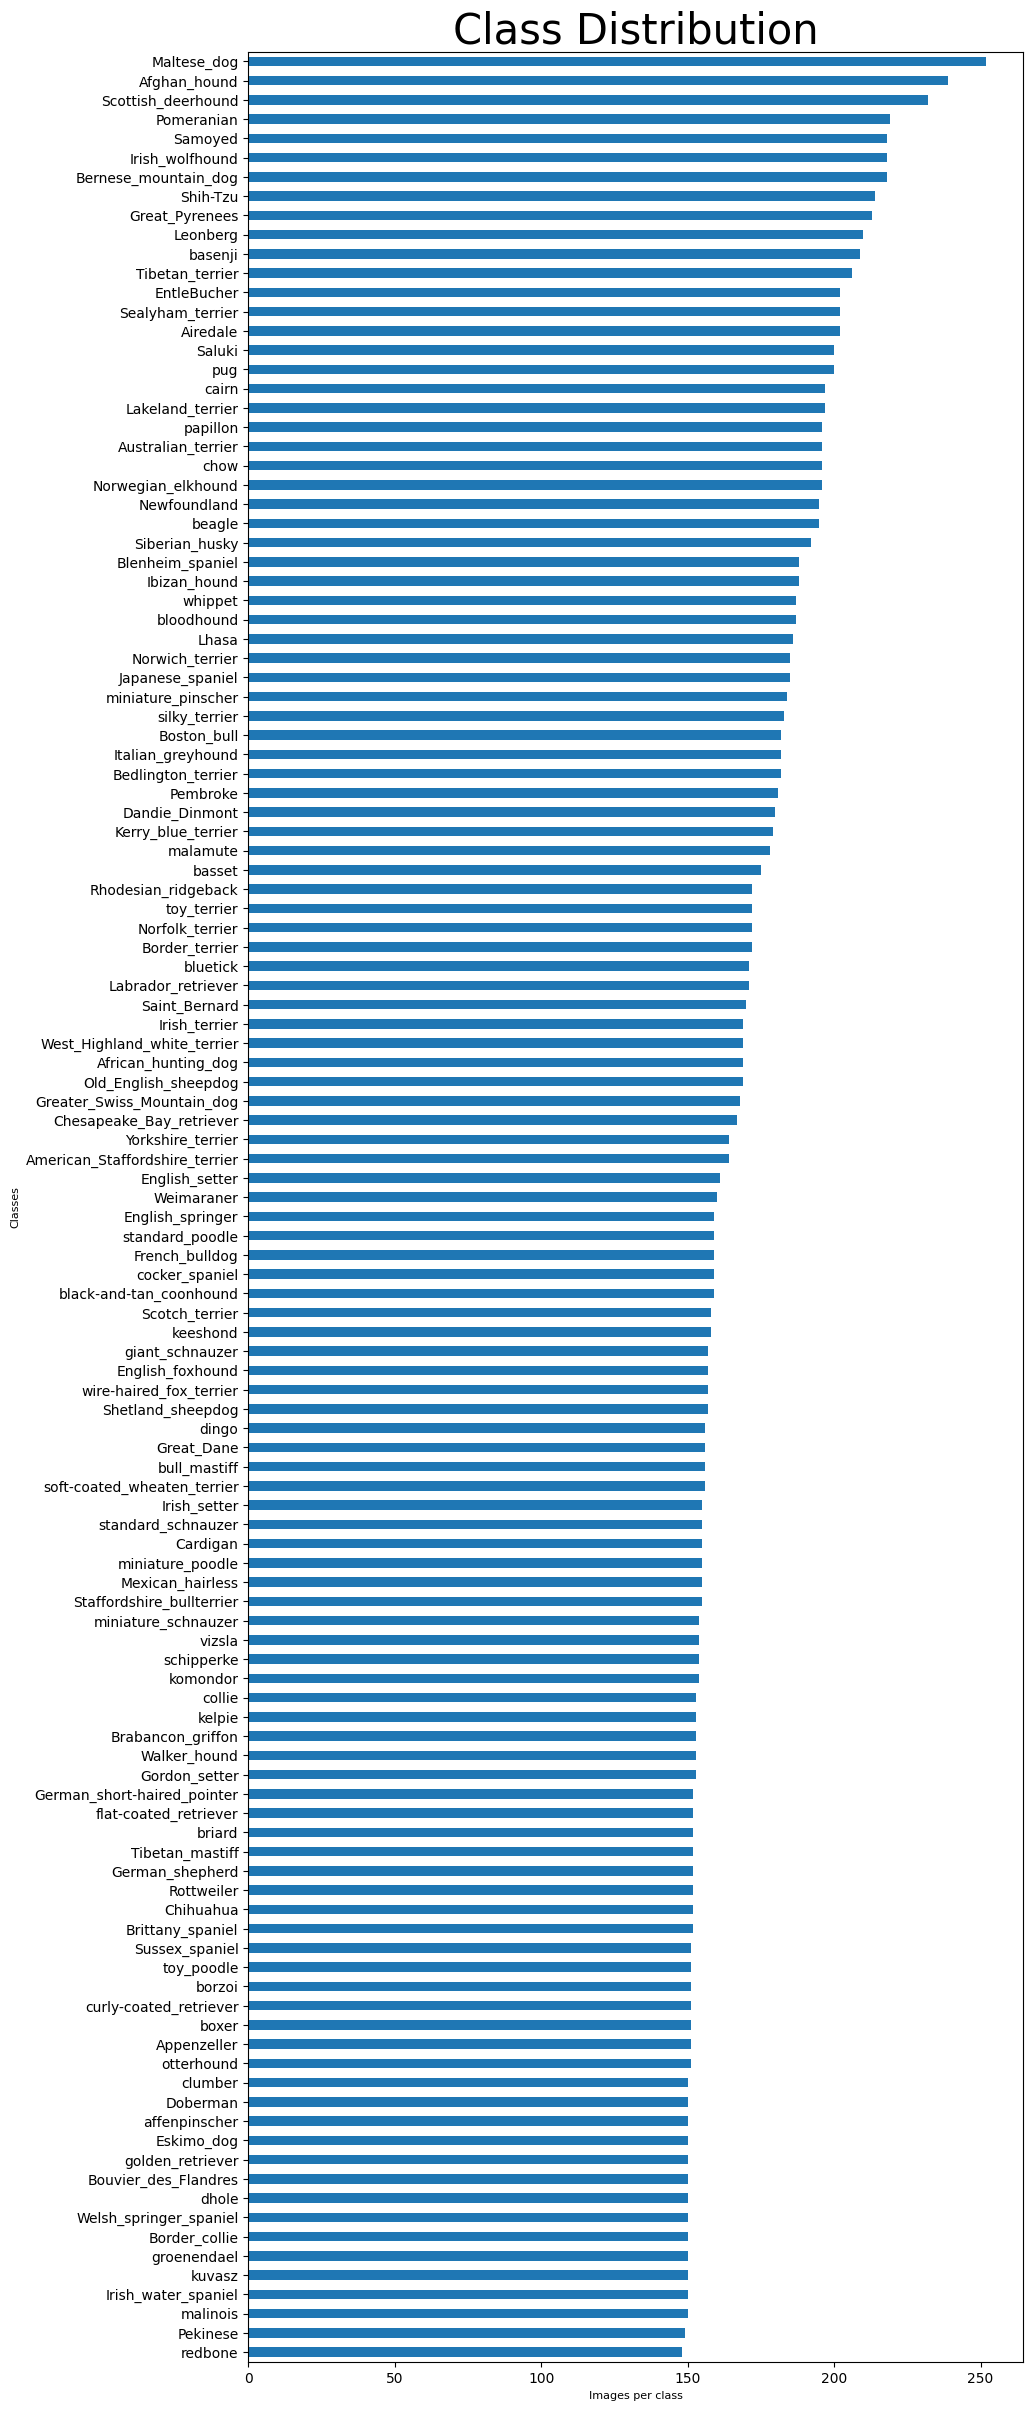

In [34]:
# Take a look at the class/breed distribution
ax=pd.value_counts(df['breed'],ascending=True).plot(kind='barh',fontsize="10",title="Class Distribution",figsize=(10,30))
ax.set(xlabel="Images per class", ylabel="Classes")
ax.xaxis.label.set_size(8)
ax.yaxis.label.set_size(8)
ax.title.set_size(30)
plt.show()

###  Chargement des images directement du disque
Pour Machine Learning Operation, nous chargeons les images et les convertissons en un  numpy array de pixels

Les fichier sont divisés automatiquement en dataset de training et validation tout en appliquant quelques preprossessing comme la redimmentionnement

In [37]:
training, validation = tf.keras.utils.image_dataset_from_directory(
    img_files,
    labels='inferred',
    label_mode='categorical',
    class_names=f2,
    color_mode='rgb',
    batch_size=32,
    image_size=(120, 120),
    shuffle=True,
    seed=42,
    validation_split=0.3,
    subset='both',
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False
    
)

Found 20580 files belonging to 120 classes.
Using 14406 files for training.
Using 6174 files for validation.


In [38]:
validation.class_names

['n02085620-Chihuahua',
 'n02085782-Japanese_spaniel',
 'n02085936-Maltese_dog',
 'n02086079-Pekinese',
 'n02086240-Shih-Tzu',
 'n02086646-Blenheim_spaniel',
 'n02086910-papillon',
 'n02087046-toy_terrier',
 'n02087394-Rhodesian_ridgeback',
 'n02088094-Afghan_hound',
 'n02088238-basset',
 'n02088364-beagle',
 'n02088466-bloodhound',
 'n02088632-bluetick',
 'n02089078-black-and-tan_coonhound',
 'n02089867-Walker_hound',
 'n02089973-English_foxhound',
 'n02090379-redbone',
 'n02090622-borzoi',
 'n02090721-Irish_wolfhound',
 'n02091032-Italian_greyhound',
 'n02091134-whippet',
 'n02091244-Ibizan_hound',
 'n02091467-Norwegian_elkhound',
 'n02091635-otterhound',
 'n02091831-Saluki',
 'n02092002-Scottish_deerhound',
 'n02092339-Weimaraner',
 'n02093256-Staffordshire_bullterrier',
 'n02093428-American_Staffordshire_terrier',
 'n02093647-Bedlington_terrier',
 'n02093754-Border_terrier',
 'n02093859-Kerry_blue_terrier',
 'n02093991-Irish_terrier',
 'n02094114-Norfolk_terrier',
 'n02094258-Norwi

In [ ]:
train_dataset = training.prefetch(buffer_size=tf.data.AUTOTUNE)
valid_dataset = validation.prefetch(buffer_size=tf.data.AUTOTUNE)

###  Définir le Deep Learning Model

In [ ]:
# Taille de l'image et autres paramètres
img_width, img_height = 120, 120
batch_size = 32
num_classes = 120
epochs = 20

# CNN model
model = Sequential()

# -----------------------------------------------------------------------------------
# conv 1
model.add(Conv2D(16, (3,3), input_shape=(img_height, img_width, 3)))       # input -N,150,150,3, output- N,148,148,16
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 1
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                                   #input- N,148,148,16, output- N, 74,74,16

# -----------------------------------------------------------------------------------
# # conv 2
model.add(Conv2D(32, (3,3)))                                                         #input- N,74,74,16 output - N, 72,72,16
model.add(BatchNormalization(axis=3))
model.add(Activation('relu'))
#model.add(Dropout(0.5))

# max pool 2
model.add(MaxPooling2D(pool_size=(2,2),strides=2))                                 #input - N,72,72,16, output- N,36,36,16
# -----------------------------------------------------------------------------------

# flatten
model.add(Flatten())                                                            # output- 1568



# fc layer 2
model.add(Dense(120, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss=categorical_crossentropy, metrics=['accuracy'])



### Initialisez le modèle et vérifiez-le Résumé.

In [ ]:
# Train the model
history = model.fit(
    training,
    epochs=epochs,
    validation_data=validation
    
)
model.summary()

Epoch 1/20
451/451 [==============================] - 102s 220ms/step - loss: 8.9859 - accuracy: 0.0249 - val_loss: 5.4562 - val_accuracy: 0.0298
Epoch 2/20
451/451 [==============================] - 98s 217ms/step - loss: 4.1287 - accuracy: 0.1073 - val_loss: 4.5768 - val_accuracy: 0.0509
Epoch 3/20
451/451 [==============================] - 105s 232ms/step - loss: 3.5822 - accuracy: 0.1904 - val_loss: 4.7713 - val_accuracy: 0.0517
Epoch 4/20
451/451 [==============================] - 105s 231ms/step - loss: 2.9122 - accuracy: 0.3151 - val_loss: 5.2857 - val_accuracy: 0.0491
Epoch 5/20
451/451 [==============================] - 109s 242ms/step - loss: 1.6994 - accuracy: 0.5739 - val_loss: 6.6359 - val_accuracy: 0.0441
Epoch 6/20
451/451 [==============================] - 102s 226ms/step - loss: 0.6413 - accuracy: 0.8391 - val_loss: 7.6852 - val_accuracy: 0.0520
Epoch 7/20
451/451 [==============================] - 101s 224ms/step - loss: 0.3001 - accuracy: 0.9237 - val_loss: 9.4151 - 

In [ ]:
#from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Chemin de la nouvelle photo
new_photo_path = 'dog.jpg'

# Chargement de la photo
img = load_img(new_photo_path, target_size=(img_width, img_height))

# Conversion de l'image en tableau numpy
img_array = img_to_array(img)

# Prétraitement de l'image (normalisation)
img_array = img_array / 255.0

# Ajout d'une dimension supplémentaire pour correspondre à la forme d'entrée du modèle
img_array = tf.expand_dims(img_array, 0)

In [ ]:
# Load the trained model
model = model#keras.models.load_model('path/to/your/model.h5')

# Load and preprocess the new photo
image_path = './train_df/n02085620-Chihuahua/n02085620_6931.jpg'
image = Image.open(image_path)
image = image.resize((120, 120))  # Resize to match the input size of the model
image_array = np.array(image)
image_array = image_array / 255.0  # Normalize pixel values between 0 and 1
image_array = np.expand_dims(image_array, axis=0)  # Add a batch dimension

# Make predictions
predictions = model.predict(image_array)
predicted_breed_index = np.argmax(predictions[0])

1/1 [==============================] - 0s 230ms/step


In [ ]:
#df2.breed[predicted_breed_index]

validation.class_names[predicted_breed_index]

'n02107908-Appenzeller'

### Tracé graphique de la précision et de la perte du modèle pendant la formation.

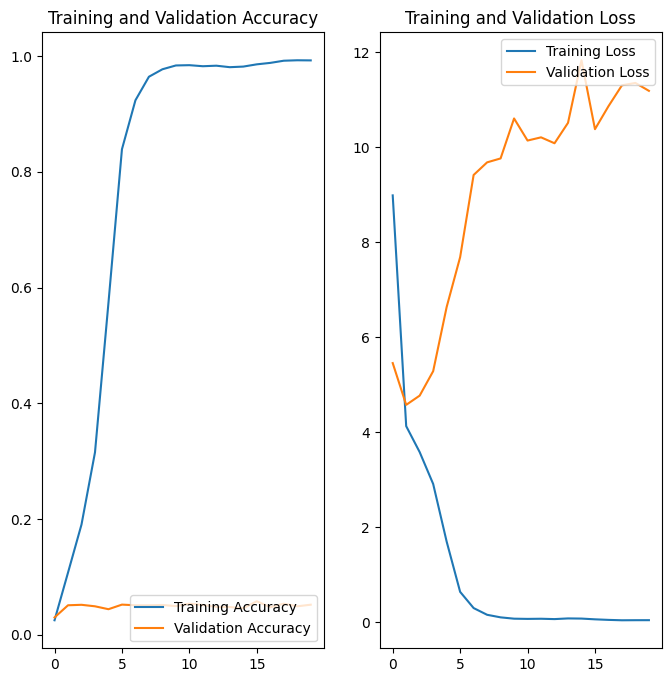

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

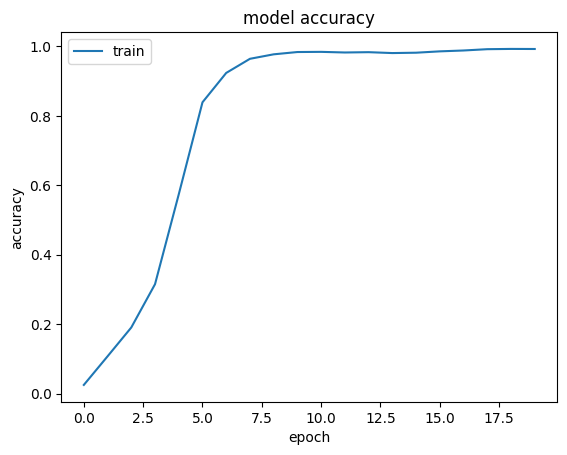

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

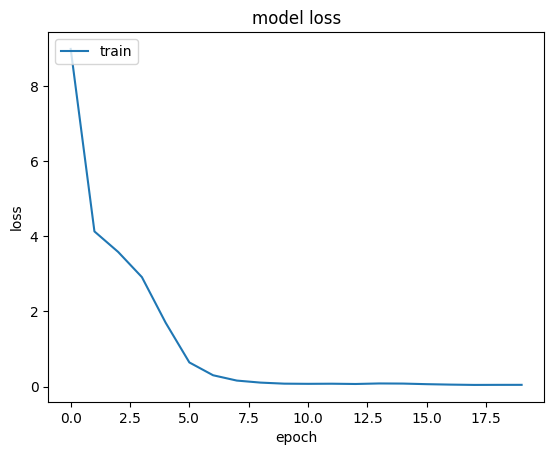

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:


# serialize model to JSON
#  the keras model which is trained is defined as 'model' in this example
model_json = model.to_json()


with open("model_num.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("model_num.h5")